In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joypy
import plotly_express as px
warnings.filterwarnings('ignore')

In [30]:
pip install plotly_express

In [2]:
data = pd.read_csv('Leads.csv')
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
table=pd.pivot_table(data,values=['TotalVisits'],index=['Converted','Total Time Spent on Website'],aggfunc={'TotalVisits':'count'})
print(table)

                                       TotalVisits
Converted Total Time Spent on Website             
0         0                                   1277
          1                                      4
          2                                     13
          3                                      7
          4                                     10
...                                            ...
1         2137                                   1
          2140                                   1
          2170                                   1
          2217                                   0
          2253                                   1

[2581 rows x 1 columns]


In [8]:
table.head(10)

TotalVisits
Converted Total Time Spent on Website             
0         0                                   1277
          1                                      4
          2                                     13
          3                                      7
          4                                     10
          5                                     11
          6                                      6
          7                                      7
          8                                      9
          9                                      9

In [10]:
data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [12]:
data["Specialization"].unique()

array(['Select', 'Business Administration', 'Media and Advertising', nan,
       'Supply Chain Management', 'IT Projects Management',
       'Finance Management', 'Travel and Tourism',
       'Human Resource Management', 'Marketing Management',
       'Banking, Investment And Insurance', 'International Business',
       'E-COMMERCE', 'Operations Management', 'Retail Management',
       'Services Excellence', 'Hospitality Management',
       'Rural and Agribusiness', 'Healthcare Management', 'E-Business'],
      dtype=object)

In [13]:
data["Page Views Per Visit"].unique()

array([ 0.  ,  2.5 ,  2.  ,  1.  ,  4.  ,  8.  ,  2.67, 11.  ,  5.  ,
        6.  ,  3.  ,  1.33,  1.5 ,  3.5 ,  7.  ,  2.33, 13.  ,  8.5 ,
        5.5 ,  1.67,   nan,  4.5 ,  3.33, 16.  , 12.  ,  1.71,  1.8 ,
        6.5 ,  4.33, 14.  ,  3.4 , 10.  ,  1.25,  1.75,  2.63, 15.  ,
        2.25,  3.67,  1.43,  9.  ,  2.6 ,  4.75,  1.27,  3.25,  5.33,
        2.57,  2.17,  2.75,  2.8 ,  2.2 ,  2.86,  3.91,  1.4 ,  5.67,
        3.2 ,  1.38,  2.09,  2.4 , 55.  ,  5.25,  6.71,  3.57,  2.22,
        1.83,  3.6 ,  1.2 ,  1.57,  1.56,  5.4 ,  4.25,  1.31,  1.6 ,
        2.9 ,  1.23,  1.78,  3.83,  7.5 ,  1.14,  2.71,  1.45,  2.38,
        1.86,  2.29,  1.21, 12.33,  3.43,  2.56,  6.33,  1.64,  8.21,
        4.4 ,  3.17,  8.33,  1.48,  1.22, 24.  ,  3.75,  6.67,  1.54,
        2.13,  2.14,  2.45,  3.29,  4.17,  1.63,  3.38,  1.17, 14.5 ,
        3.8 ,  1.19,  3.82,  2.83,  1.93, 11.5 ,  2.08])

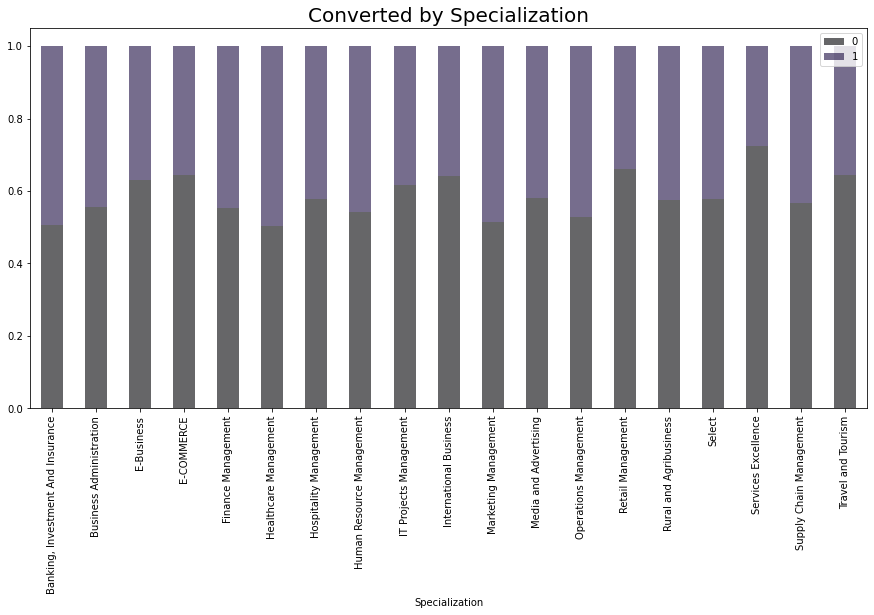

In [20]:
#pandas crostab
#The crosstab() function is used to compute a simple cross tabulation of two (or more) factors. By default computes a
#frequency table of the factors unless an array of values and an aggregation function are passed.

incident = pd.crosstab(data['Specialization'] , data['Converted'])
colors = plt.cm.inferno(np.linspace(0,1,10))
incident.div(incident.sum(1).astype(float),axis=0).plot(kind = 'bar',
                                                       stacked = True,
                                                       figsize = (15,7),
                                                       color = colors,
                                                       alpha = .6)
plt.title('Converted by Specialization' , fontsize =20)
plt.legend()
plt.show()

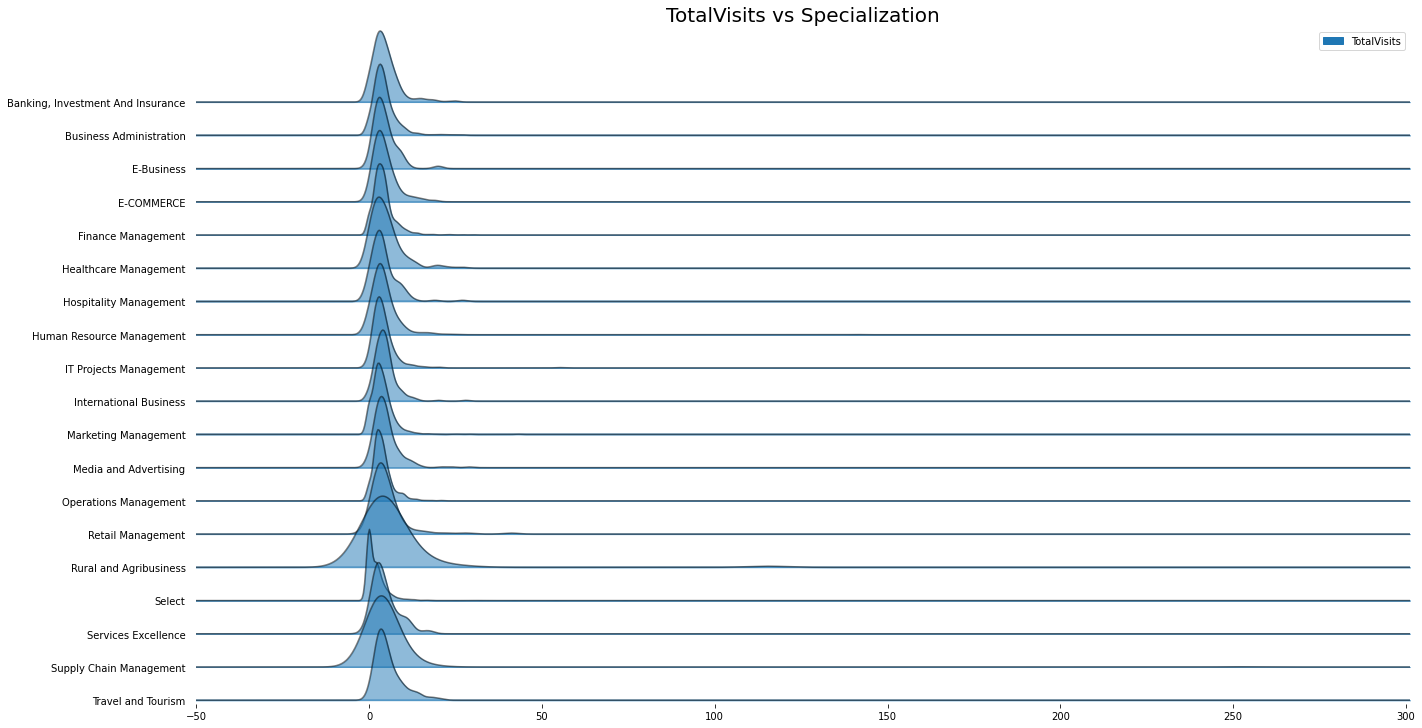

In [28]:
#A Joyplot is a series of histograms, density plots or time series for a number of data segments,
#all aligned to the same horizontal scale.
fig , axis = joypy.joyplot(data,
                            column = ["TotalVisits"],
                            by= 'Specialization',
                            ylim = 'own',
                            figsize = (20,10),
                            alpha = 0.5,
                            legend = True)
plt.title("TotalVisits vs Specialization", fontsize = 20)
plt.show()

In [32]:
#The plotly.express module (usually imported as px ) contains functions that can create entire figures at once, 
#and is referred to as Plotly Express or PX.


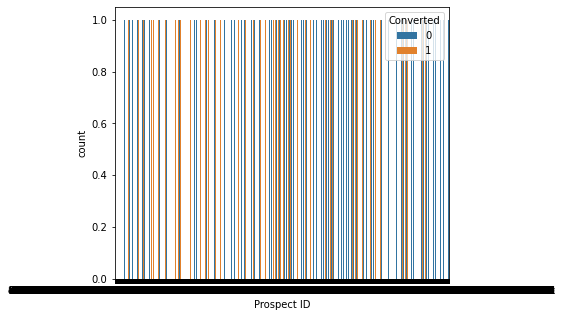

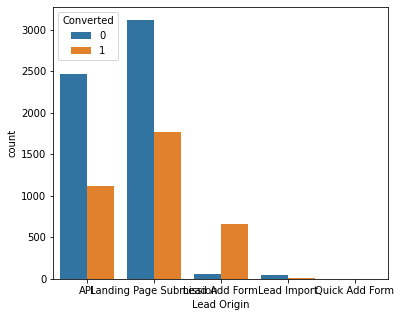

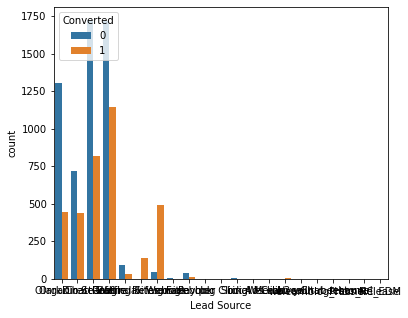

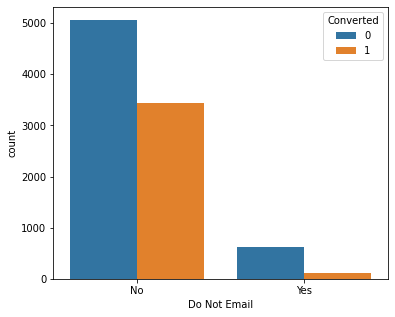

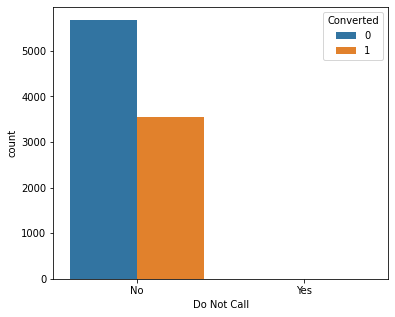

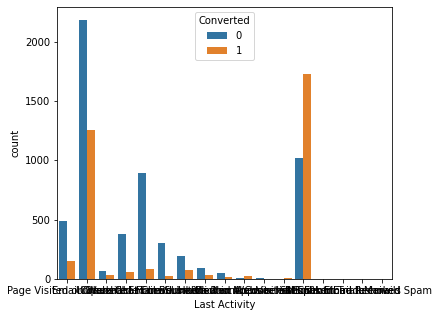

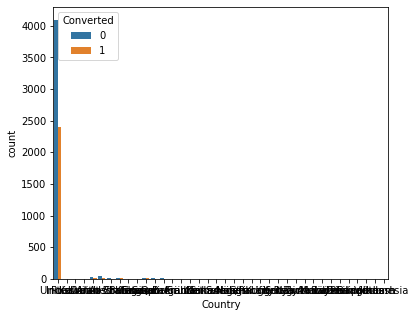

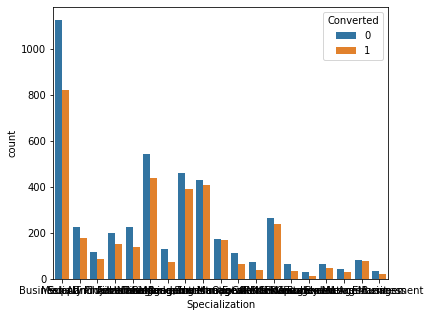

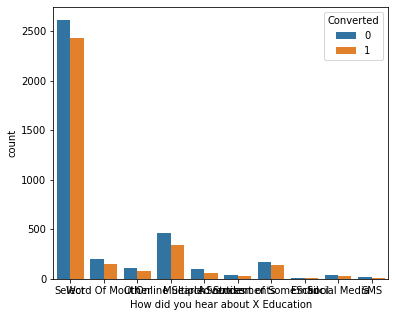

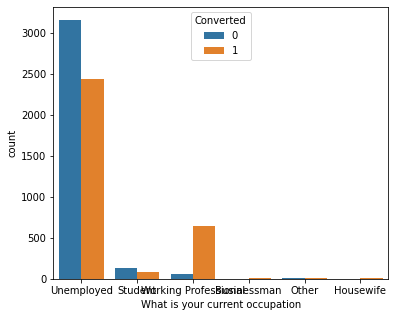

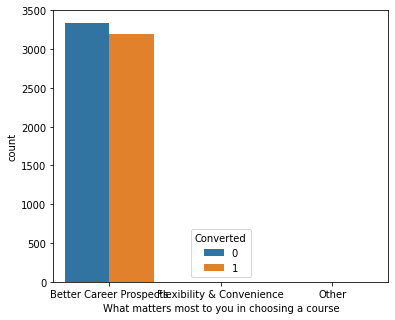

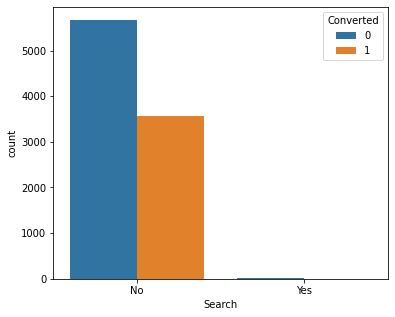

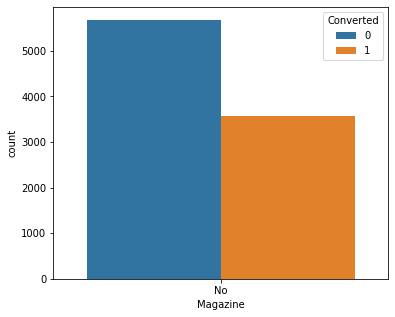

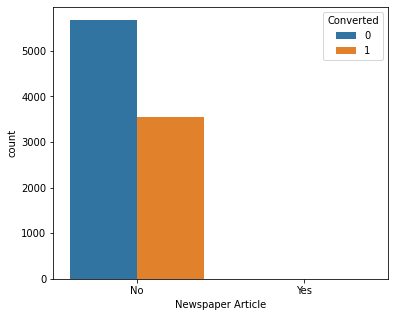

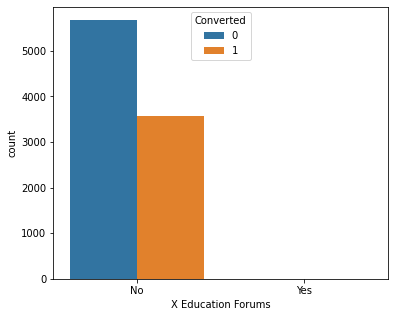

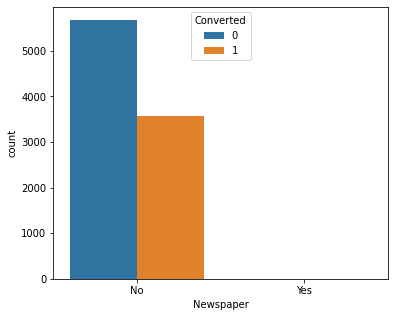

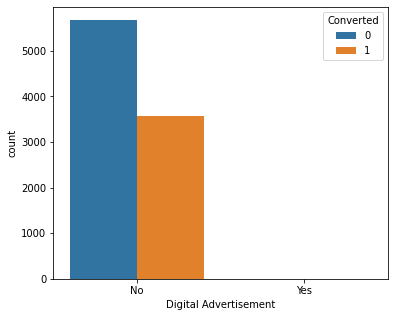

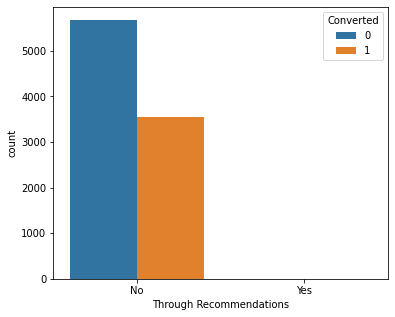

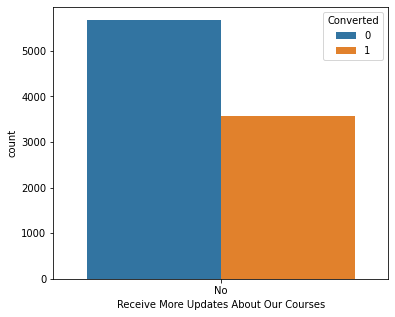

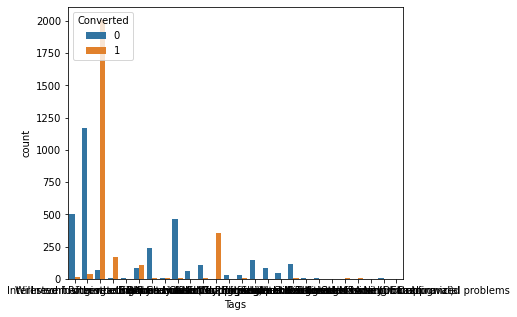

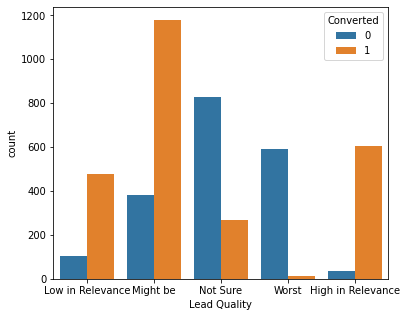

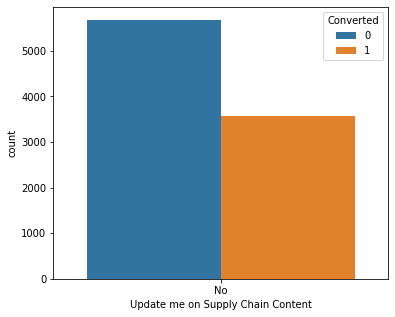

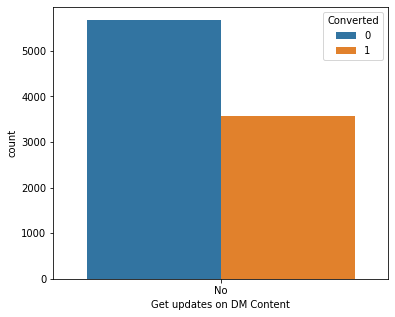

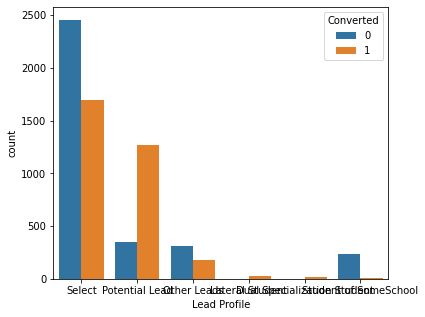

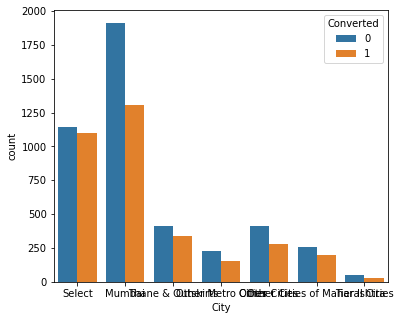

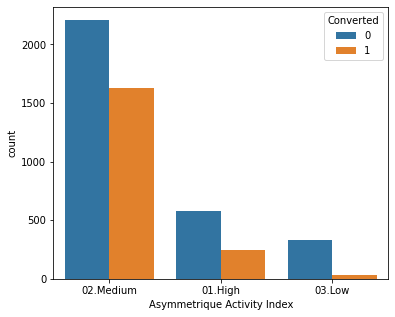

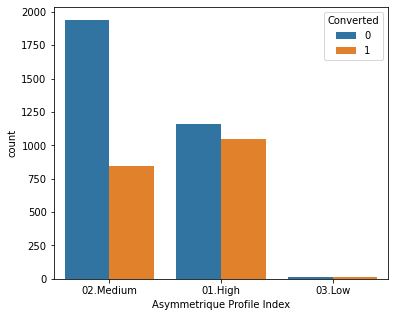

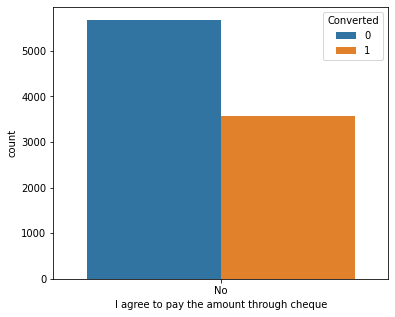

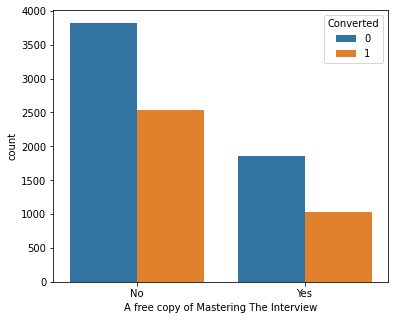

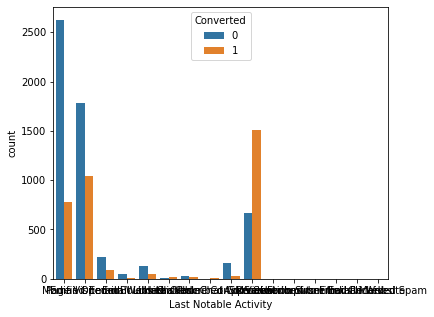

In [35]:
# count plot using seaborn
X = list(i for i in data._get_numeric_data().columns)
Y = list(i for i in data.columns if i not in X)

for i in Y:
    plt.figure(figsize=(6,5))
    sns.countplot(x=i, hue='Converted', data=data)